In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.sparse import csr_matrix

raiting = pd.read_csv('./ratings_drop.csv' , usecols=[ 'userId' , 'productId' , 'rating'] )
products = pd.read_csv('./products_join_categories.csv')
products = products.loc[:, ~products.columns.str.contains('^Unnamed')]
products.set_index( ['productId'] , inplace=True, drop=True )
products = products.rename({'name': 'product_name'}, axis='columns')
display(products.head())

,product_name,catIds,cat1,cat1_name,cat2,cat2_name,cat3,cat3_name
productId,,,,,,,,
0,CSSMs Biology: Control in Cells and in Organis...,"832,476,923",832,图书音像,476,其它图书,923.0,进口图书
1,Treasure Island,"832,1101,1086",832,图书音像,1101,少儿/教育图书,1086.0,少儿
2,Collins Primary Dictionaries – Collins Junior ...,"832,476,739",832,图书音像,476,其它图书,739.0,工具书
3,Partners in Crime,"832,476,923",832,图书音像,476,其它图书,923.0,进口图书
4,The Hobbit,"832,1101,1086",832,图书音像,1101,少儿/教育图书,1086.0,少儿


In [2]:
raiting.sample(10)
display(products.sample(10))

,product_name,catIds,cat1,cat1_name,cat2,cat2_name,cat3,cat3_name
productId,,,,,,,,
41751,PUMA 彪马 基本系列 男式 针织外套 827739,"1111,942,184",1111,运动户外,942,运动服装,184.0,运动卫衣
131629,Great Expectations,"832,476,923",832,图书音像,476,其它图书,923.0,进口图书
104185,幻想大王奇遇记5:永远的星期五,"832,1101,1086",832,图书音像,1101,少儿/教育图书,1086.0,少儿
353390,经济计量学精要(原书第3版),"832,1101,1116",832,图书音像,1101,少儿/教育图书,1116.0,考试
23311,咏春拳入门必读(附盘),"832,665,253",832,图书音像,665,生活类图书,253.0,体育/运动
179154,曲一线科学备考????(2014)新课标????5年中考3年模拟:中考化学(学生用书)(全国版),"832,1101,374",832,图书音像,1101,少儿/教育图书,374.0,中小学教辅
271826,"宝优妮乐步鞋架DQ-0922(可自由组合成三层或六层鞋架,收纳高手,多层空间,安装便捷)","571,1058,983",571,家具/家装/建材,1058,家具,983.0,其他家具
273987,The Principles of Scientific Management,"832,476,923",832,图书音像,476,其它图书,923.0,进口图书
257529,BANDAI 万代 动漫 公仔 模型 人偶 人物收藏 海贼王 超航海王造型-红发杰克斯 E5...,"57,209,484",57,其他,209,玩具/娃娃/模型/动漫/桌游,484.0,动漫周边/公仔


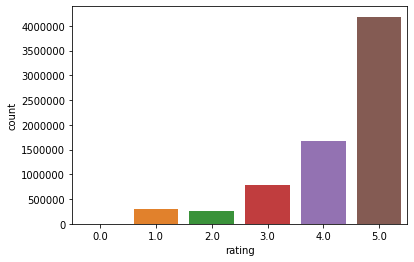

In [3]:
sns.countplot(data=raiting , x = 'rating' )
plt.show()

In [4]:
userRaitingCount = raiting['userId'].value_counts();
raitingFiltered = raiting[raiting['userId'].isin(userRaitingCount[userRaitingCount >= 50 ].index)]
print(raitingFiltered.shape)
print(raiting.shape)
productRaitingCount = raiting['productId'].value_counts();
raitingFiltered = raitingFiltered[raitingFiltered['userId'].isin(productRaitingCount[productRaitingCount >= 100 ].index)]
print(raitingFiltered.shape)

(1847803, 3)
(7202921, 3)
(35024, 3)


In [5]:
raitingFiltered.drop_duplicates(subset=['userId', 'productId'], keep='first' , inplace =True )
raitingFilteredPivot = raitingFiltered.pivot( index='productId' , columns='userId' , values="rating" ).fillna(0)

In [6]:
joinEdRaiting = pd.merge(products, raitingFiltered, on='productId', how='inner')

In [7]:
display(display(joinEdRaiting.sample(10)))

,productId,product_name,catIds,cat1,cat1_name,cat2,cat2_name,cat3,cat3_name,userId,rating
21255,336369,徐璐精选画集:王子,"832,519,164",832,图书音像,519,文学艺术,164.0,动漫/幽默,2281.0,5.0
7276,111889,配色设计原理,"832,519,1076",832,图书音像,519,文学艺术,1076.0,艺术,52362.0,4.0
6702,103745,Warrior 回力 常青款 中性 情侣帆布休闲运动鞋 WXY-45,"518,884,478",518,鞋类箱包,884,运动鞋,478.0,其他运动鞋,96746.0,3.0
14980,233350,罗尔德????达尔作品典藏:了不起的狐狸爸爸,"832,1101,1086",832,图书音像,1101,少儿/教育图书,1086.0,少儿,10368.0,5.0
2131,29738,SanDisk 闪迪 microSDHC Class10 32GB至尊高速移动存储卡 UHS...,"1057,268,902",1057,电脑/办公,268,存储设备,902.0,存储卡,24514.0,5.0
19191,300956,魅生????凤鸣卷,"832,519,402",832,图书音像,519,文学艺术,402.0,青春文学,81268.0,5.0
20796,328922,欧也妮????葛朗台;高老头;幻灭,"832,519,1",832,图书音像,519,文学艺术,1.0,小说,5701.0,5.0
22691,358446,红楼梦,"832,519,1",832,图书音像,519,文学艺术,1.0,小说,4962.0,4.0
14879,231449,"致我们终将逝去的青春(附""致青春""珍藏卡册)","832,519,402",832,图书音像,519,文学艺术,402.0,青春文学,27211.0,4.0
22996,363124,Life of Pi,"832,1101,1086",832,图书音像,1101,少儿/教育图书,1086.0,少儿,953.0,4.0


None

In [11]:
#user based:
raitingFilteredMatrix = csr_matrix(raitingFilteredPivot.values)
model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(raitingFilteredMatrix)
NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine', metric_params=None, n_jobs=1, n_neighbors=5, p=2, radius=1.0)

#489000->productId
queryIndex = raitingFilteredPivot.index.get_loc(231449)
# queryIndex = np.random.choice(raitingFilteredPivot.shape[0])
distances, indices = model_knn.kneighbors(raitingFilteredPivot.iloc[queryIndex, :].values.reshape(1, -1), n_neighbors=6)

print('Recommendations for {0} ( {1} | {2} | {3} :\n'.format( products.iloc[raitingFilteredPivot.index[queryIndex]].product_name ,
                                                                     products.iloc[raitingFilteredPivot.index[queryIndex]].cat1_name,
                                                                     products.iloc[raitingFilteredPivot.index[queryIndex]].cat2_name,
                                                                     products.iloc[raitingFilteredPivot.index[queryIndex]].cat3_name))

for i in range(0, len(distances.flatten())):
        print('{0}: {1} ( {2} | {3} | {4} ) , with distance of {5}:'.format(i,
                                                                           products.iloc[raitingFilteredPivot.index[indices.flatten()[i]]].product_name ,
                                                                           products.iloc[raitingFilteredPivot.index[indices.flatten()[i]]].cat1_name,
                                                                           products.iloc[raitingFilteredPivot.index[indices.flatten()[i]]].cat2_name,
                                                                           products.iloc[raitingFilteredPivot.index[indices.flatten()[i]]].cat3_name,
                                                                           distances.flatten()[i]))

Recommendations for 致我们终将逝去的青春(附"致青春"珍藏卡册) ( 图书音像 | 文学艺术 | 青春文学 :

0: 致我们终将逝去的青春(附"致青春"珍藏卡册) ( 图书音像 | 文学艺术 | 青春文学 ) , with distance of 0.0:
1: 致我们终将逝去的青春(典藏版) ( 图书音像 | 文学艺术 | 青春文学 ) , with distance of 0.3859923880002929:
2: 星火英语:真题详解+标准预测6级(附CD-ROM+词汇卡片) ( 图书音像 | 少儿/教育图书 | 考试 ) , with distance of 0.5521889244801009:
3: Edifier漫步者 R1200T 2.0声道音箱(木色 丝膜球顶高音,4英寸低音扬声器) ( 电脑/办公 | 外设产品 | 电脑音箱 ) , with distance of 0.554815405055026:
4: 致我们终将逝去的青春 ( 图书音像 | 文学艺术 | 青春文学 ) , with distance of 0.5799159747915971:
5: 别笑!我是英文单词书(全彩图文本)(随书附赠390分钟1、2、3.4英汉双语朗读光盘!) ( 图书音像 | 少儿/教育图书 | 外语 ) , with distance of 0.6059787862023847:
